<a href="https://colab.research.google.com/github/sagihaider/CE880_2021/blob/main/Week7/Exercise_7_1_Decision_tree_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CE880: An Approachable Introduction to Data Science
### Prepared by: Haider Raza (h.raza@essex.ac.uk)
### Approximate time: 120 minutes

***
## Learning Outcome 

* Decision Tree
***
# Introduction to Decision Tree algorithm

A Decision Tree algorithm is one of the most popular machine learning algorithms. It uses a tree like structure and their possible combinations to solve a particular problem. It belongs to the class of supervised learning algorithms where it can be used for both classification and regression purposes. 

A decision tree is a structure that includes a root node, branches (decision nodes), and leaf nodes. Each internal node denotes a test on an attribute, each branch denotes the outcome of a test, and each leaf node holds a class label. The topmost node in the tree is the root node. 

### Decision-Tree terminology

![Decision-Tree terminology](https://gdcoder.com/content/images/2019/05/Screen-Shot-2019-05-18-at-03.40.41.png)

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = '/content/car_evaluation.csv'
df = pd.read_csv(data, header=None)

In [4]:
# view dimensions of dataset
df.shape

(1728, 7)

We can see that there are 1728 instances and 7 variables in the data set.

### View top 5 rows of dataset

In [5]:
# preview the dataset
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Rename column names

We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. We should give proper names to the columns. I will do it as follows:-

In [6]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [7]:
# let's again preview the dataset
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


We can see that the column names are renamed. Now, the columns have meaningful names.

### View summary of dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### Frequency distribution of values in variables

Now, I will check the frequency counts of categorical variables.

In [9]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
for col in col_names:
    print(df[col].value_counts())   


vhigh    432
med      432
low      432
high     432
Name: buying, dtype: int64
vhigh    432
med      432
low      432
high     432
Name: maint, dtype: int64
3        432
4        432
5more    432
2        432
Name: doors, dtype: int64
4       576
more    576
2       576
Name: persons, dtype: int64
med      576
big      576
small    576
Name: lug_boot, dtype: int64
med     576
low     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


We can see that the `doors` and `persons` are categorical in nature. So, I will treat them as categorical variables.

### Summary of variables


- There are 7 variables in the dataset. All the variables are of categorical data type.


- These are given by `buying`, `maint`, `doors`, `persons`, `lug_boot`, `safety` and `class`.


- `class` is the target variable.

### Explore `class` variable

In [10]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

The `class` target variable is ordinal in nature.

### Missing values in variables

In [11]:
# check missing values in variables

df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

We can see that there are no missing values in the dataset. I have checked the frequency distribution of values previously. It also confirms that there are no missing values in the dataset.

# Declare feature vector and target variable

In [13]:
X = df.drop(['class'], axis=1)
y = df['class']

# Split data into separate training and test set

In [14]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [15]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1157, 6), (571, 6))

# Feature Engineering

**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

First, I will check the data types of variables again.

In [16]:
# check data types in X_train
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

### Encode categorical variables


Now, I will encode the categorical variables.

In [17]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


We can see that all  the variables are ordinal categorical data type.

In [25]:
# import category encoders
!pip install category-encoders
import category_encoders as ce

In [27]:
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [28]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [29]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


We now have training and test set ready for model building. 

## Decision Tree Classifier with criterion gini index

In [30]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [31]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

### Predict the Test set results with criterion gini index

In [32]:
y_pred_gini = clf_gini.predict(X_test)

### Check accuracy score with criterion gini index

In [33]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8021


Here, **y_test** are the true class labels and **y_pred_gini** are the predicted class labels in the test-set.

### Compare the train-set and test-set accuracy


Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [34]:
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [35]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7865


### Check for overfitting and underfitting

In [36]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7865
Test set score: 0.8021


Here, the training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting. 


### Visualize decision-trees

[Text(267.84000000000003, 380.52, 'X[5] <= 1.5\ngini = 0.455\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(133.92000000000002, 271.8, 'gini = 0.0\nsamples = 386\nvalue = [0, 0, 386, 0]'),
 Text(401.76000000000005, 271.8, 'X[3] <= 2.5\ngini = 0.577\nsamples = 771\nvalue = [255, 49, 427, 40]'),
 Text(267.84000000000003, 163.07999999999998, 'X[0] <= 2.5\ngini = 0.631\nsamples = 525\nvalue = [255, 49, 181, 40]'),
 Text(133.92000000000002, 54.360000000000014, 'gini = 0.496\nsamples = 271\nvalue = [124, 0, 147, 0]'),
 Text(401.76000000000005, 54.360000000000014, 'gini = 0.654\nsamples = 254\nvalue = [131, 49, 34, 40]'),
 Text(535.6800000000001, 163.07999999999998, 'gini = 0.0\nsamples = 246\nvalue = [0, 0, 246, 0]')]

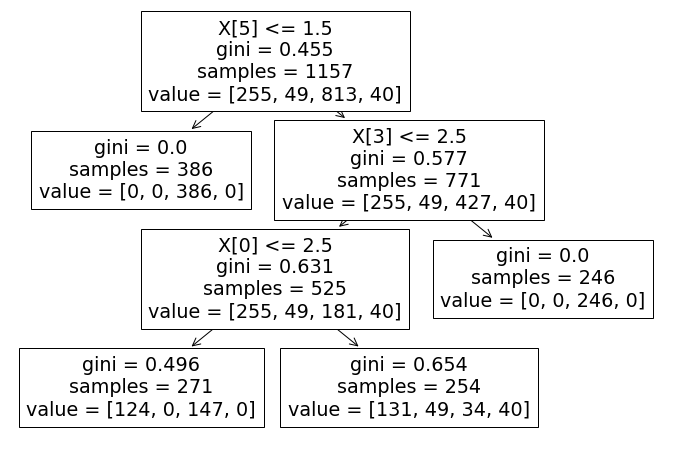

In [37]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train)) 

### Visualize decision-trees with graphviz

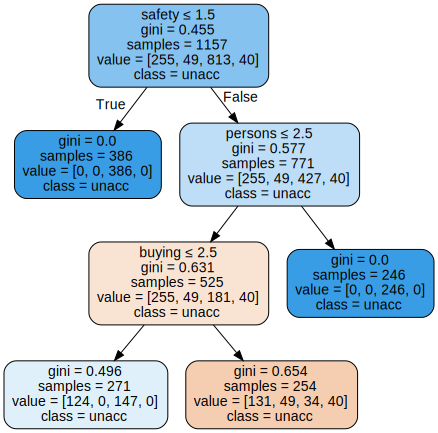

In [38]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 
graph 